<a href="https://colab.research.google.com/github/aaolcay/Analog-and-Digital-Communication/blob/main/Amplitude_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Amplitude Modulation vs Double-Sideband Suppressed Carrier**
In this notebook we introduce Amplitude Modulation (AM) by defining some related terms such as modulation index and transmission efficiency and comparing with Double-Sideband Suppressed Carrier (DSB-SC). For more information about DSB-SC please see our [notebook](https://github.com/aaolcay/Analog-and-Digital-Communication/blob/main/DSB_SC.ipynb).

AM is a type of modulation where the amplitude of a high-frequency carrier signal is varied in proportion to a lower-frequency message signal. The resulting modulated signal has a higher frequency than the original message signal and is transmitted over a communication channel. The modulated signal can be demodulated at the receiving end to recover the original message signal.

The differences between AM and DSB-SC are that in AM, the carrier signal is present and its amplitude varies, whereas in DSB-SC, the carrier signal is suppressed and only the two sidebands are transmitted. DSB-SC has a higher spectral efficiency since it only transmits the two sidebands, but it requires more complex modulation and demodulation circuits compared to AM.

The modulation index is a key parameter that describes the degree of amplitude modulation applied to the carrier signal. It is defined as the ratio of the amplitude of the message signal to the amplitude of the carrier signal. In AM, the modulation index should be less than or equal to 1 to avoid overmodulation and distortion of the modulated signal.

The transmission efficiency is the ratio of the power of the modulated signal to the total power transmitted, expressed as a percentage. In AM, the transmission efficiency depends on the modulation index and is given by the formula:

\begin{equation}
\eta_{AM} = \frac{A_{m}^2}{2 A_{c}^2 + A_{m}^2} \times 100%
\end{equation}

where $A_{m}$ is the amplitude of the message signal and $A_{c}$ is the amplitude of the carrier signal.

In DSB-SC, the transmission efficiency is always 100% since the carrier signal is not transmitted along with the modulated signal. In an AM communication, the best possible transmission efficiency can be ~33%, that is one of the main drawbacks of AM. Nevertheless, as the AM signal carries carrier signal and has offset that provides receiver to know the carrier frequency, it reduces the cost and complexity of receiver. Therefore, it is more useful in broadcasting thatn that with DSB-SC.

Let's now create both AM and DSB-SC modulated signals, and compute both their magnitude spectrums and transmission efficiencies. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the carrier signal parameters
fc = 1000  # Carrier frequency (Hz)
Ac = 1  # Carrier amplitude

# Define the message signal parameters
fm = 100  # Message frequency (Hz)
Am = 0.5  # Message amplitude

# Define the time axis
Fs = 10 * fc  # Sampling rate (Hz)
T = 1 / Fs  # Sampling period (s)
t = np.arange(0, 1, T)  # Time vector (s)

# Generate the carrier signal
c = Ac * np.cos(2 * np.pi * fc * t)

# Generate the message signal
m = Am * np.sin(2 * np.pi * fm * t)

# Modulate the carrier signal with the message signal using AM
s_AM = (1 + m) * c # s_AM = [Ac + m(t)]*cos(2*pi*fc*t), Ac is the offset

# Modulate the carrier signal with the message signal using DSB-SC
s_DSB_SC = m * np.cos(2 * np.pi * fc * t) # s_DSB_SC = m(t)*cos(2*pi*fc*t)

# Calculate transmission efficiency of AM
eta_AM = (Am**2) / (2*Ac**2 + Am**2) * 100

# Calculate Transmission efficiency of AM with Modulation Index (MI)
MI = Am/Ac
eta_AM_with_MI = (MI**2)/(2+MI**2) * 100
assert eta_AM == eta_AM_with_MI

# Calculate transmission efficiency of DSB-SC
eta_DSB_SC = (Am**2 / Am**2) * 100
# The transmission efficiency for DSB-SC modulation 
# is always 100%, regardless of the modulation index, 
# since the carrier signal is not transmitted along with the modulated signal.

Let's plot the message, carrier and modulated signals in time domain.

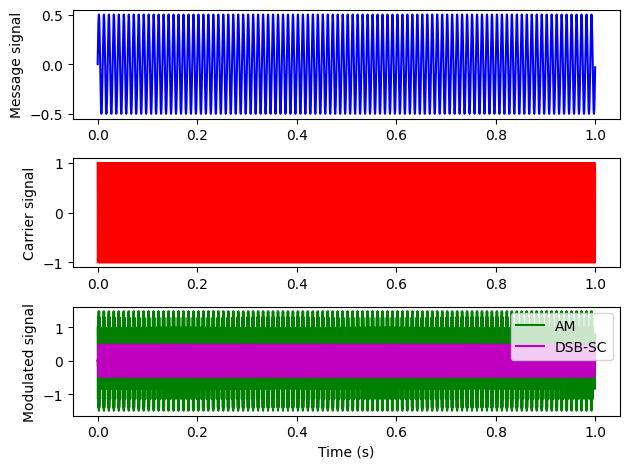

In [2]:
# Plot the signals in the time domain
plt.subplot(3, 1, 1)
plt.plot(t, m, 'b')
plt.ylabel('Message signal')
plt.subplot(3, 1, 2)
plt.plot(t, c, 'r')
plt.ylabel('Carrier signal')
plt.subplot(3, 1, 3)
plt.plot(t, s_AM, 'g', label='AM')
plt.plot(t, s_DSB_SC, 'm', label='DSB-SC')
plt.ylabel('Modulated signal')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

If we look closer to the modulated signals, we can see there is no phase reversal in AM signal but there is in DSB-SC modulated signal.

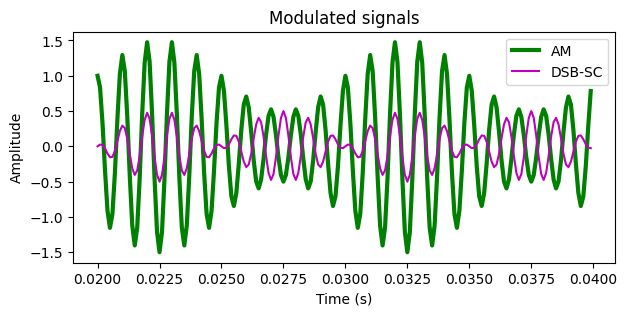

In [3]:
plt.figure(figsize=(7,3))
plt.plot(t[200:400], s_AM[200:400], 'g', label='AM', linewidth=3.0)
plt.plot(t[200:400], s_DSB_SC[200:400], 'm', label='DSB-SC')
plt.title('Modulated signals')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')
plt.show()

In DSB-SC modulation, the carrier signal is multiplied with the message signal, resulting in a product waveform that is centered at the carrier frequency. However, since the message signal can take on negative values, the resulting product waveform can have negative portions as well. This means that the phase of the carrier signal is being reversed during the negative portions of the message signal, and is not present during the positive portions.

In contrast, in AM modulation, the message signal is added to the carrier signal, resulting in a modulated signal that has no negative portions. Therefore, there is no phase reversal in AM modulation. This makes sense when the condition "*`the modulation index should be less than or equal to 1 to avoid overmodulation and distortion of the modulated signal`*" is satisfied.

Let's also see the magnitude spectrums of AM and DSB-SC modulated signals.

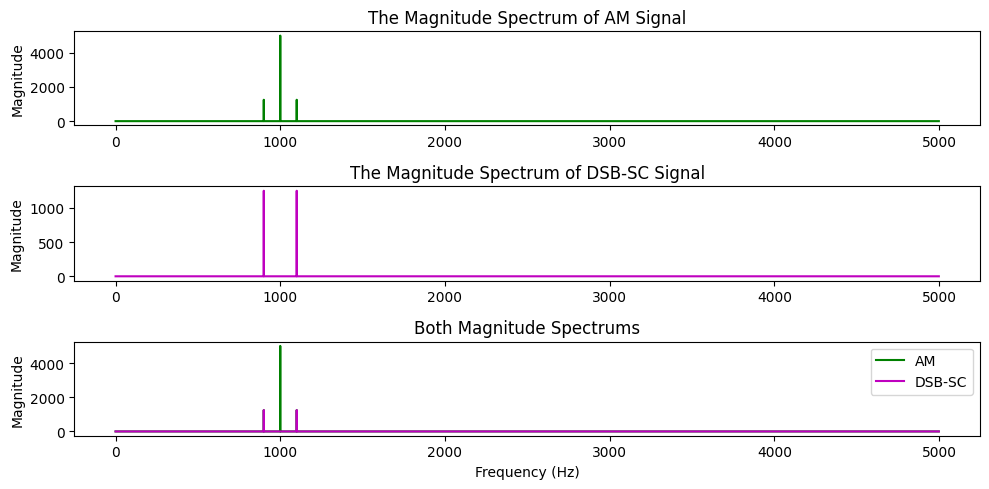

In [4]:
# Compute the magnitude spectrum of the modulated signals
df = Fs/len(t) # Frequency resolution
freqs = np.arange(0, Fs/2, df) # Frequency axis (Hz)

S_AM = np.fft.fft(s_AM)
S_AM = np.abs(S_AM[0:len(S_AM)//2]) # Magnitude spectrum of AM signal

S_DSB_SC = np.fft.fft(s_DSB_SC)
S_DSB_SC = np.abs(S_DSB_SC[0:len(S_DSB_SC)//2]) # Magnitude spectrum of DSB-SC signal

# Plot the magnitude spectra of the modulated signals
# Plot the magnitude spectra of the modulated signals
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

# Plot AM signal
axs[0].plot(freqs, S_AM, 'g')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('The Magnitude Spectrum of AM Signal')

# Plot DSB-SC signal
axs[1].plot(freqs, S_DSB_SC, 'm')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('The Magnitude Spectrum of DSB-SC Signal')

# Plot both signals on the same plot
axs[2].plot(freqs, S_AM, 'g', label='AM')
axs[2].plot(freqs, S_DSB_SC, 'm', label='DSB-SC')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Magnitude')
axs[2].legend(loc='upper right')
axs[2].set_title('Both Magnitude Spectrums')

plt.tight_layout()
plt.show()

As observed from the plots, the magnitude spectrum of the AM signal has a significant peak at the carrier frequency, which is set to 1 kHz in this notebook. This is because the message signal is added to the carrier signal in AM modulation, resulting in a modulated signal with energy at the carrier frequency. On the other hand, the magnitude spectrum of DSB-SC modulation does not include any energy at the carrier frequency. This is because the carrier signal in DSB-SC modulation is suppressed, leaving only the message signal. Therefore, DSB-SC modulation does not have any energy at the carrier frequency in its magnitude spectrum.

In AM modulation, this additional carrier signal carries no information, yet it is transmitted along with the modulated signal (for reducing the cost and complexity, eventually to facilitate synchronous detection at the receivers). This means that a significant amount of energy is transmitted at the carrier frequency, even though it does not carry any useful information. This results in a reduction of transmission efficiency because a portion of the transmitted energy is wasted on transmitting the carrier signal.

Furthermore, when the modulated signal is received, the carrier signal needs to be removed from the received signal to recover the original message signal. However, due to the presence of noise and interference, it is difficult to remove the carrier signal completely, resulting in residual carrier signal that is present in the recovered message signal. This residual carrier can lead to additional noise and distortion in the recovered signal, which can degrade the quality of the signal.

Therefore, the energy transmitted at the carrier frequency is essentially wasted, and it reduces the transmission efficiency of the system. To overcome this issue, techniques such as DSB-SC and SSB modulation have been developed, which eliminate the transmission of the carrier signal and improve the transmission efficiency of the system.

The computed transmission efficiencies are given below for both AM and DSB-SC modulated signals.

In [5]:
# Print the transmission efficiencies
print(f"Transmission Efficiencies are:\nAM:{eta_AM : .2f}%\nDSB-SC:{eta_DSB_SC}%")

Transmission Efficiencies are:
AM: 11.11%
DSB-SC:100.0%


####**Attribution**
The introductory explanations and code in this notebook were authored by Abdullah A. Olcay from the University of Southampton. Please give credit to him or acknowledge the use of this notebook. The following resources were also utilized by the author:

- M. S. Roden, "Analog and Digital Communication Systems," Prentice-Hall, Inc., 1991.
- W. Tomasi, "Electronic Communication Systems Fundamentals," 1994.
- D.K. Sharma, A. Mishra, and R. Saxena, "Analog & digital modulation techniques: an overview," International Journal of Computing Science and Communication Technologies, vol. 3, no. 1, pp. 2007, 2010.